In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9hcHBsaWNhdGlvbnM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_82189/400304049.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



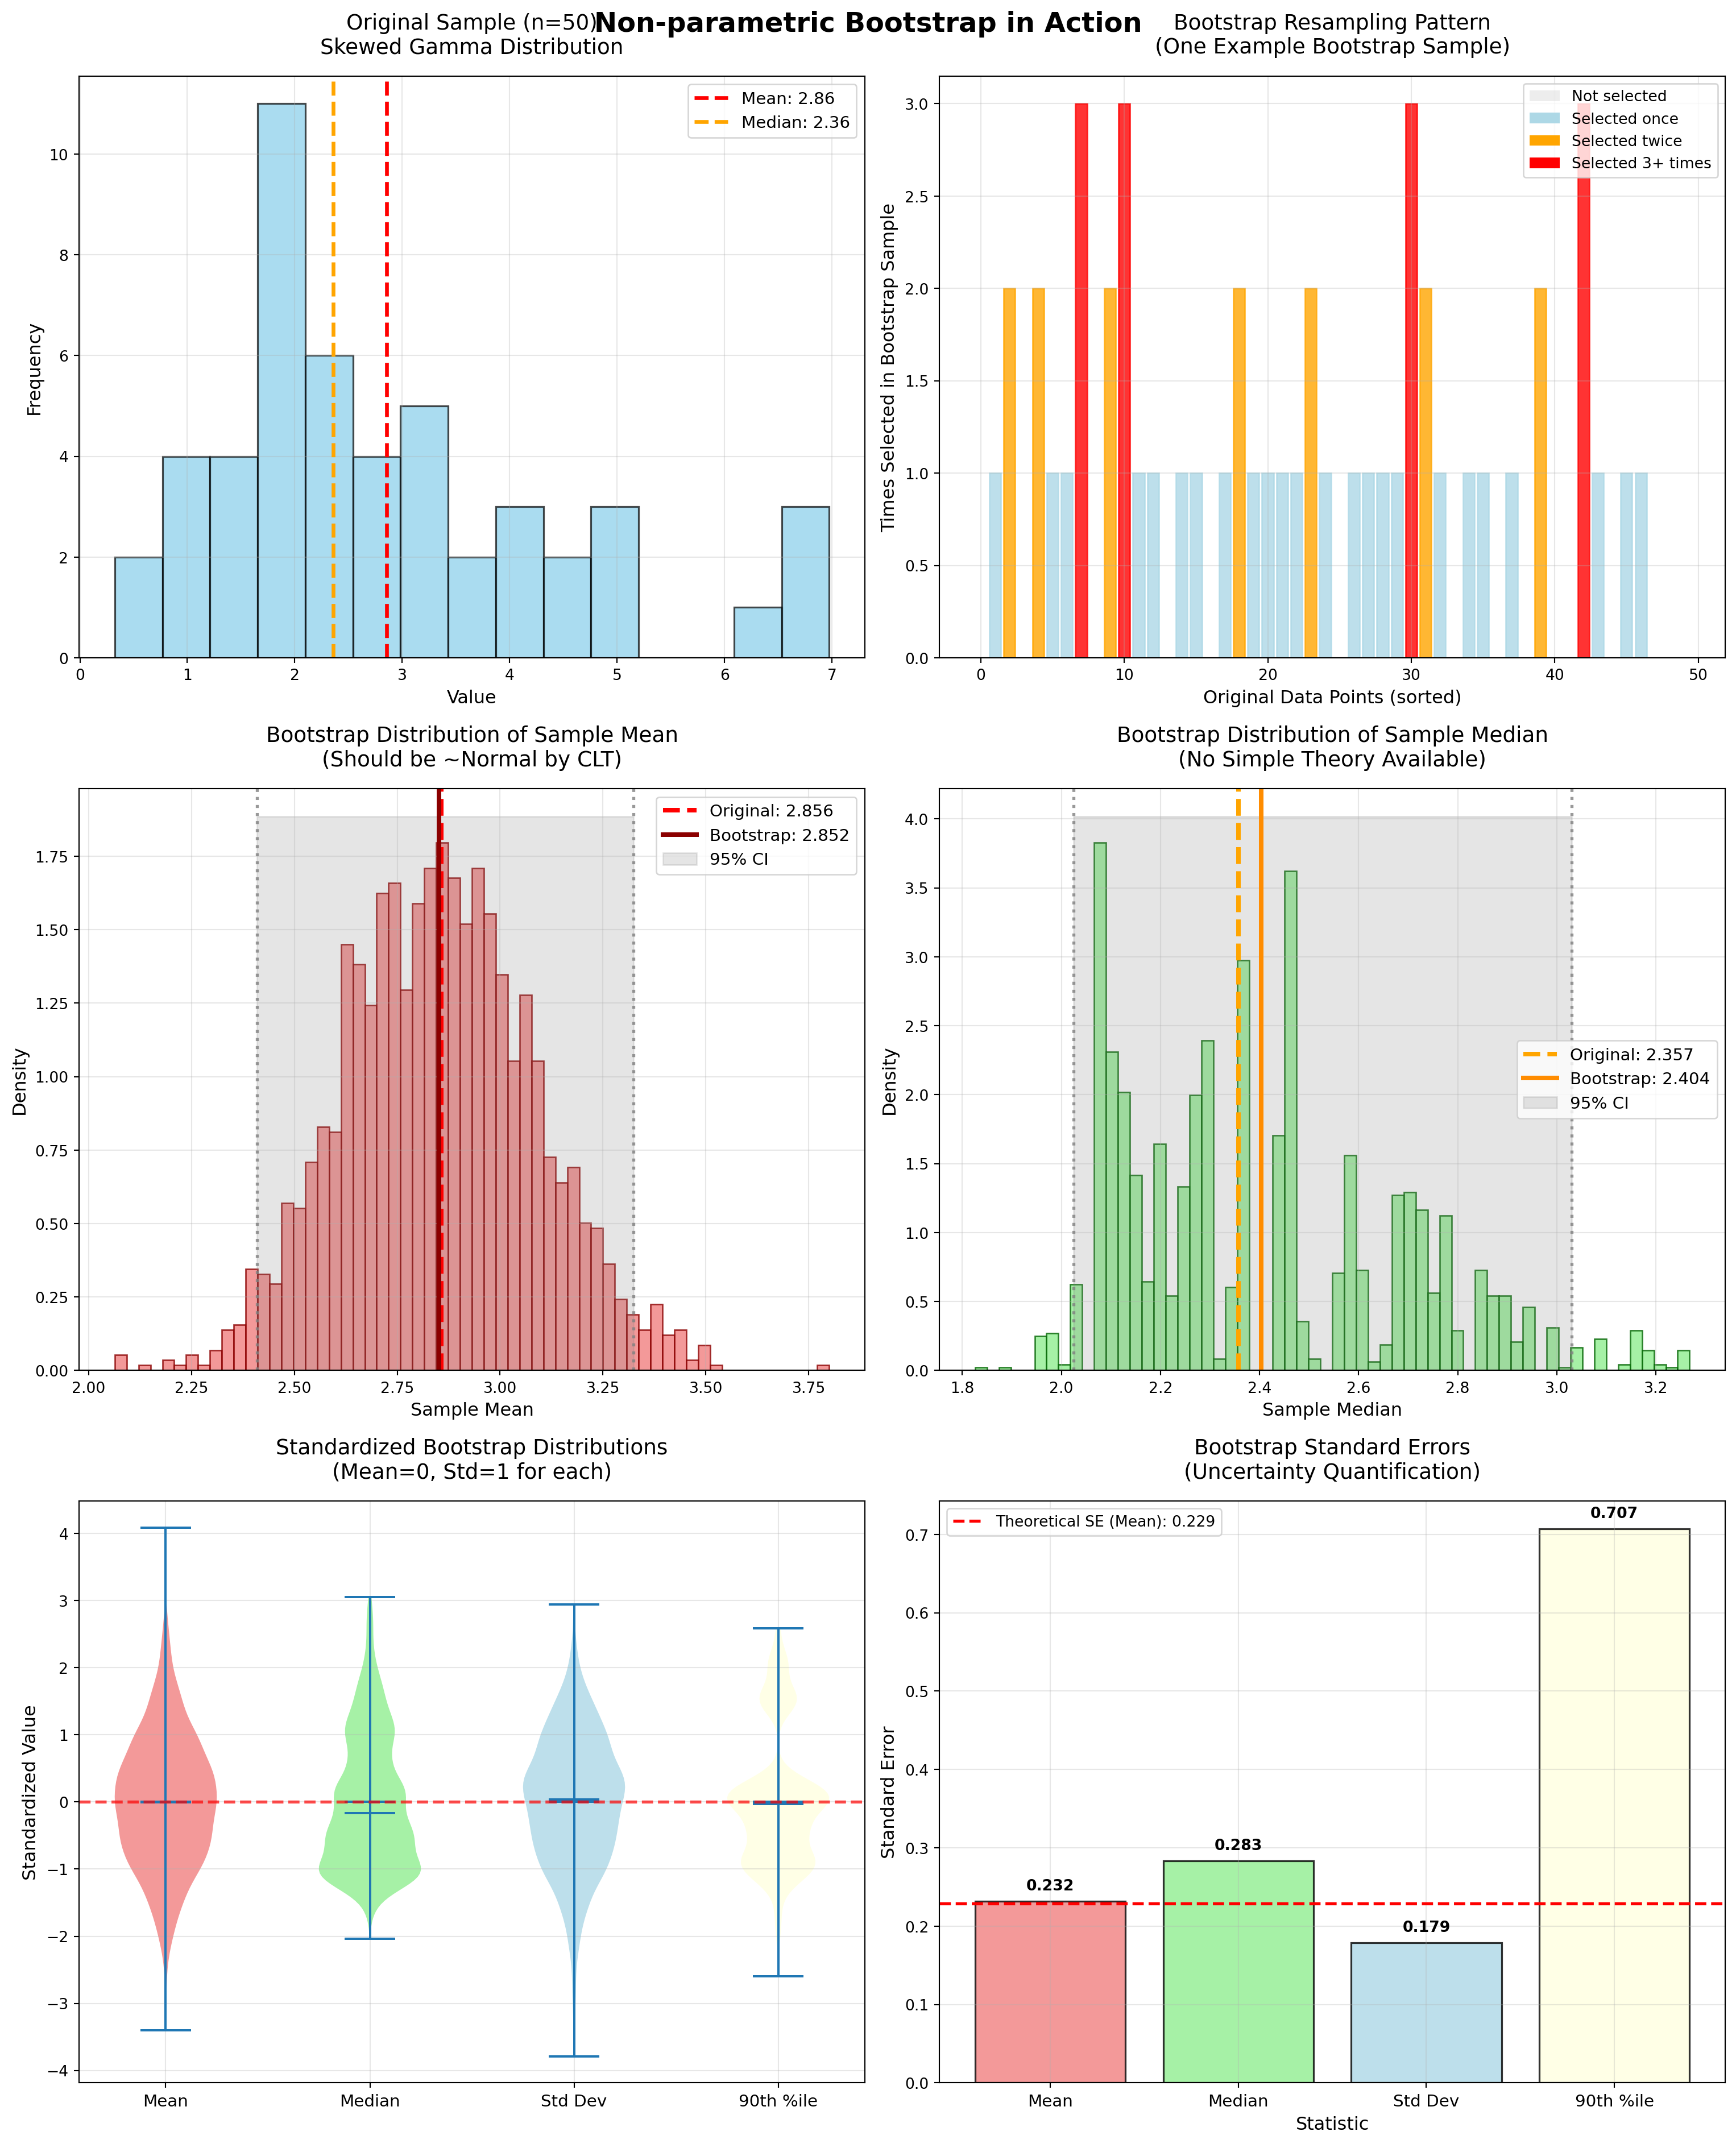

Bootstrap Summary: 2,000 resamples from n=50 observations
Mean SE: Bootstrap=0.232, Theory=0.229


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate original sample from a skewed distribution (gamma)
n = 50
true_shape, true_scale = 2, 1.5
original_sample = np.random.gamma(true_shape, true_scale, n)

def bootstrap_statistic(data, statistic_func, n_bootstrap=1000):
    """
    Perform non-parametric bootstrap for any statistic
    """
    bootstrap_stats = []
    n = len(data)
    
    for _ in range(n_bootstrap):
        # Resample with replacement (this is the key bootstrap step)
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Compute statistic on bootstrap sample
        bootstrap_stats.append(statistic_func(bootstrap_sample))
    
    return np.array(bootstrap_stats)

# Define statistics to bootstrap
def sample_mean(x):
    return np.mean(x)

def sample_median(x):
    return np.median(x)

def sample_std(x):
    return np.std(x, ddof=1)

def sample_90th_percentile(x):
    return np.percentile(x, 90)

# Perform bootstrap for different statistics
B = 2000  # Number of bootstrap samples
bootstrap_means = bootstrap_statistic(original_sample, sample_mean, B)
bootstrap_medians = bootstrap_statistic(original_sample, sample_median, B)
bootstrap_stds = bootstrap_statistic(original_sample, sample_std, B)
bootstrap_90th = bootstrap_statistic(original_sample, sample_90th_percentile, B)

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 20))
fig.suptitle('Non-parametric Bootstrap in Action', fontsize=18, fontweight='bold', y=0.98)

# 1. Original sample histogram
axes[0, 0].hist(original_sample, bins=15, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
axes[0, 0].axvline(np.mean(original_sample), color='red', linestyle='--', linewidth=2.5,
                   label=f'Mean: {np.mean(original_sample):.2f}')
axes[0, 0].axvline(np.median(original_sample), color='orange', linestyle='--', linewidth=2.5,
                   label=f'Median: {np.median(original_sample):.2f}')
axes[0, 0].set_title('Original Sample (n=50)\nSkewed Gamma Distribution', fontsize=14, pad=15)
axes[0, 0].set_xlabel('Value', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. Bootstrap resampling demonstration - show actual resampling process
np.random.seed(42)  # Reset for consistent example
bootstrap_sample = np.random.choice(original_sample, size=n, replace=True)

# Count how many times each original value appears in bootstrap sample
unique_orig, indices = np.unique(original_sample, return_inverse=True)
unique_boot, counts_boot = np.unique(bootstrap_sample, return_counts=True)

# Create a mapping to show resampling
resampling_counts = np.zeros(len(unique_orig))
for val, count in zip(unique_boot, counts_boot):
    idx = np.where(unique_orig == val)[0]
    if len(idx) > 0:
        resampling_counts[idx[0]] = count

# Bar plot showing resampling pattern
x_pos = np.arange(len(unique_orig))
bars = axes[0, 1].bar(x_pos, resampling_counts, alpha=0.8, 
                      color=['lightcoral' if c > 0 else 'lightgray' for c in resampling_counts],
                      edgecolor='black', linewidth=1)

# Highlight bars with different colors based on frequency
for i, (bar, count) in enumerate(zip(bars, resampling_counts)):
    if count == 0:
        bar.set_color('lightgray')
        bar.set_alpha(0.4)
    elif count == 1:
        bar.set_color('lightblue')
    elif count == 2:
        bar.set_color('orange')
    else:
        bar.set_color('red')

axes[0, 1].set_title('Bootstrap Resampling Pattern\n(One Example Bootstrap Sample)', fontsize=14, pad=15)
axes[0, 1].set_xlabel('Original Data Points (sorted)', fontsize=12)
axes[0, 1].set_ylabel('Times Selected in Bootstrap Sample', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Add legend for resampling pattern
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgray', alpha=0.4, label='Not selected'),
    Patch(facecolor='lightblue', label='Selected once'),
    Patch(facecolor='orange', label='Selected twice'),
    Patch(facecolor='red', label='Selected 3+ times')
]
axes[0, 1].legend(handles=legend_elements, fontsize=10, loc='upper right')

# 3. Bootstrap distribution of sample mean
axes[1, 0].hist(bootstrap_means, bins=60, alpha=0.8, color='lightcoral', 
                edgecolor='darkred', linewidth=1, density=True)
axes[1, 0].axvline(np.mean(original_sample), color='red', linestyle='--', linewidth=3,
                   label=f'Original: {np.mean(original_sample):.3f}')
axes[1, 0].axvline(np.mean(bootstrap_means), color='darkred', linestyle='-', linewidth=3,
                   label=f'Bootstrap: {np.mean(bootstrap_means):.3f}')

# Add confidence interval shading
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
axes[1, 0].axvline(ci_lower, color='gray', linestyle=':', linewidth=2, alpha=0.8)
axes[1, 0].axvline(ci_upper, color='gray', linestyle=':', linewidth=2, alpha=0.8)
y_max = axes[1, 0].get_ylim()[1]
axes[1, 0].fill_betweenx([0, y_max], ci_lower, ci_upper, 
                         alpha=0.2, color='gray', label='95% CI')

axes[1, 0].set_title('Bootstrap Distribution of Sample Mean\n(Should be ~Normal by CLT)', fontsize=14, pad=15)
axes[1, 0].set_xlabel('Sample Mean', fontsize=12)
axes[1, 0].set_ylabel('Density', fontsize=12)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# 4. Bootstrap distribution of sample median
axes[1, 1].hist(bootstrap_medians, bins=60, alpha=0.8, color='lightgreen', 
                edgecolor='darkgreen', linewidth=1, density=True)
axes[1, 1].axvline(np.median(original_sample), color='orange', linestyle='--', linewidth=3,
                   label=f'Original: {np.median(original_sample):.3f}')
axes[1, 1].axvline(np.mean(bootstrap_medians), color='darkorange', linestyle='-', linewidth=3,
                   label=f'Bootstrap: {np.mean(bootstrap_medians):.3f}')

# Add confidence interval for median
ci_lower_med, ci_upper_med = np.percentile(bootstrap_medians, [2.5, 97.5])
axes[1, 1].axvline(ci_lower_med, color='gray', linestyle=':', linewidth=2, alpha=0.8)
axes[1, 1].axvline(ci_upper_med, color='gray', linestyle=':', linewidth=2, alpha=0.8)
y_max = axes[1, 1].get_ylim()[1]
axes[1, 1].fill_betweenx([0, y_max], ci_lower_med, ci_upper_med, 
                         alpha=0.2, color='gray', label='95% CI')

axes[1, 1].set_title('Bootstrap Distribution of Sample Median\n(No Simple Theory Available)', fontsize=14, pad=15)
axes[1, 1].set_xlabel('Sample Median', fontsize=12)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

# 5. Violin plots comparing all bootstrap distributions (standardized)
bootstrap_stats_df = pd.DataFrame({
    'Mean': bootstrap_means,
    'Median': bootstrap_medians,
    'Std Dev': bootstrap_stds,
    '90th %ile': bootstrap_90th
})

# Standardize each distribution for comparison
bootstrap_stats_std = bootstrap_stats_df.copy()
for col in bootstrap_stats_std.columns:
    bootstrap_stats_std[col] = (bootstrap_stats_std[col] - bootstrap_stats_std[col].mean()) / bootstrap_stats_std[col].std()

# Create violin plot
parts = axes[2, 0].violinplot([bootstrap_stats_std[col] for col in bootstrap_stats_std.columns],
                              positions=range(len(bootstrap_stats_std.columns)), 
                              showmeans=True, showmedians=True)

# Color the violins
colors = ['lightcoral', 'lightgreen', 'lightblue', 'lightyellow']
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.8)

axes[2, 0].axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[2, 0].set_title('Standardized Bootstrap Distributions\n(Mean=0, Std=1 for each)', fontsize=14, pad=15)
axes[2, 0].set_ylabel('Standardized Value', fontsize=12)
axes[2, 0].set_xticks(range(len(bootstrap_stats_std.columns)))
axes[2, 0].set_xticklabels(bootstrap_stats_std.columns, fontsize=11)
axes[2, 0].grid(True, alpha=0.3)

# 6. Bootstrap standard errors comparison
original_stats = {
    'Mean': np.mean(original_sample),
    'Median': np.median(original_sample), 
    'Std Dev': np.std(original_sample, ddof=1),
    '90th %ile': np.percentile(original_sample, 90)
}

bootstrap_ses = [np.std(bootstrap_stats_df[col]) for col in bootstrap_stats_df.columns]
theoretical_se_mean = np.sqrt(np.var(original_sample, ddof=1)/n)

x_pos = np.arange(len(bootstrap_ses))
bars = axes[2, 1].bar(x_pos, bootstrap_ses, alpha=0.8, color=colors, 
                      edgecolor='black', linewidth=1.2)

# Add theoretical SE for mean as a reference line
axes[2, 1].axhline(theoretical_se_mean, color='red', linestyle='--', linewidth=2,
                   label=f'Theoretical SE (Mean): {theoretical_se_mean:.3f}')

# Add value labels on bars
for i, (bar, se) in enumerate(zip(bars, bootstrap_ses)):
    axes[2, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{se:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

axes[2, 1].set_title('Bootstrap Standard Errors\n(Uncertainty Quantification)', fontsize=14, pad=15)
axes[2, 1].set_xlabel('Statistic', fontsize=12)
axes[2, 1].set_ylabel('Standard Error', fontsize=12)
axes[2, 1].set_xticks(x_pos)
axes[2, 1].set_xticklabels(bootstrap_stats_df.columns, fontsize=11)
axes[2, 1].legend(fontsize=10)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Minimal summary
print(f"Bootstrap Summary: {B:,} resamples from n={n} observations")
print(f"Mean SE: Bootstrap={np.std(bootstrap_means):.3f}, Theory={theoretical_se_mean:.3f}")